In [1]:
import pandas as pd, numpy as np
from Bio import SeqIO

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
refpath = '/home/croth/Documents/DirtyDozen/REF/FungiDB-46_CneoformansH99_Genome.fasta'

In [3]:
ref = np.sum([len(s.seq) 
              for s in SeqIO.parse(refpath,format='fasta')])
ref

18916112

In [4]:
low_cov_path = '../../NOTES/low_coverage_by_factor.csv'
factors = pd.read_csv(low_cov_path);
factors.columns = ['Sample','Extraction','RNase A treatment',
                   'PicoGreen','Library','Mating spot']
factors.head()

,Sample,Extraction,RNase A treatment,PicoGreen,Library,Mating spot
0,PMY2556,new,100mg/ml,1.478,DNA plate 3,1
1,PMY2557,new,100mg/ml,1.191,DNA plate 3,1
2,PMY2558,old,100mg/ml,3.431,DNA plate 3,1
3,PMY2559,old,100mg/ml,1.369,DNA plate 1,1
4,PMY2560,old,100mg/ml,3.369,DNA plate 1,1


In [5]:
factors.shape

(384, 6)

In [6]:
runpath = '../../NOTES/201015B6_6519_report.csv'

report = pd.read_csv(runpath)

report_cols = report.columns.tolist()[4:]

report['PF Cluster'] = np.array([int(''.join(k.split(','))) for k in report['PF Cluster']])

report = report[(report.Sample!='Undetermined')]

report['Log2 PF Cluster'] = np.log2(report['PF Cluster'].values)

read_len = 150
report['Coverage'] = 2*read_len*report['PF Cluster']/ref

In [7]:
byfactor = report.merge(factors)

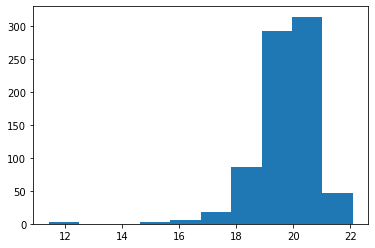

In [8]:
plt.hist(np.log2(report['PF Cluster'].values));

In [9]:
bysample = report[(report.Sample!='Undetermined')].groupby('Sample').sum()
passsample = np.array([bysample[(bysample.Coverage>=k)].shape[0] for k in np.arange(1,21)])
failsample = np.array([bysample[(bysample.Coverage<k)].shape[0] for k in np.arange(1,21)])

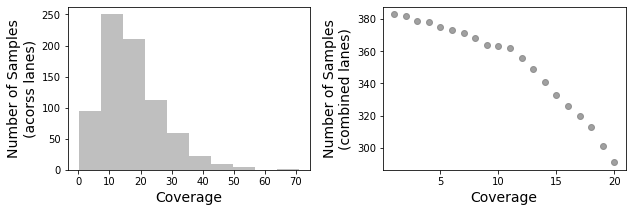

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
plt.sca(ax[0])
plt.hist(report[(report.Sample!='Undetermined')].Coverage.values,
         color='grey',alpha=0.5);
plt.ylabel('Number of Samples\n(acorss lanes)',fontsize=14)
plt.xlabel('Coverage',fontsize=14);

plt.sca(ax[1])
plt.plot(np.arange(1,21),passsample,'o',color='grey',alpha=.75);
plt.ylabel('Number of Samples\n(combined lanes)',fontsize=14);
plt.xlabel('Coverage',fontsize=14);
plt.subplots_adjust(wspace=.3)
plt.savefig('../../FIGURES/Coverage_estimation.png',
            dpi=100,bbox_inches='tight');
#plt.plot(np.arange(1,21),failsample,'ro')

In [11]:
bysample.sort_values('Coverage').tail()

,Lane,PF Cluster,% of the lane,% perfect barcode,% one mismatch barcode,%PF Clusters,% >= Q30 bases,Mean Quality Score,Log2 PF Cluster,Coverage
Sample,,,,,,,,,,
PMY2685,3,6204967,1.30,41.45,158.55,200.0,182.93,71.00,43.129818,98.407648
PMY2902,3,6234190,1.31,30.85,169.15,200.0,183.27,71.06,43.143388,98.871111
PMY2781,3,6470985,1.36,30.66,169.34,200.0,182.98,71.00,43.250943,102.626560
PMY2881,3,6573846,1.38,30.51,169.49,200.0,182.79,70.96,43.296472,104.257883
PMY2691,3,8882578,1.86,27.44,172.56,200.0,183.10,71.02,44.164980,140.873209


In [12]:
report[(report.Coverage<5)].Sample.unique()

array(['PMY2585', 'PMY2586', 'PMY2587', 'PMY2589', 'PMY2597', 'PMY2600',
       'PMY2601', 'PMY2602', 'PMY2606', 'PMY2609', 'PMY2620', 'PMY2633',
       'PMY2676', 'PMY2690', 'PMY2741', 'PMY2748', 'PMY2817', 'PMY2820',
       'PMY2821', 'PMY2823', 'PMY2828', 'PMY2829', 'PMY2861', 'PMY2870',
       'PMY2930'], dtype=object)

In [13]:
bysample[(bysample.Coverage<5)
        ].to_csv('../../NOTES/Poor_coverage_samples_combined.csv',
                 index=True)

In [14]:
report[(report.Coverage<5)
      ].to_csv('../../NOTES/Poor_coverage_samples_bylane.csv',
               index=False)

In [15]:
import seaborn as sns

In [16]:
byfactor['Library'] = [int(a[-1]) for a in byfactor.Library.values]

In [17]:
byfactor.head()

,Lane,Project,Sample,Barcode Sequence,PF Cluster,% of the lane,% perfect barcode,% one mismatch barcode,Yield (Mbases),%PF Clusters,% >= Q30 bases,Mean Quality Score,Log2 PF Cluster,Coverage,Extraction,RNase A treatment,PicoGreen,Library,Mating spot
0,1,Murray_6519_201015B6,PMY2556,ACTCACCG+ATGTATCA,1553965,0.33,17.51,82.49,469,100.0,91.36,35.47,20.567523,24.645101,new,100mg/ml,1.478,3,1
1,2,Murray_6519_201015B6,PMY2556,ACTCACCG+ATGTATCA,1586642,0.33,16.61,83.39,479,100.0,91.44,35.49,20.597545,25.163342,new,100mg/ml,1.478,3,1
2,1,Murray_6519_201015B6,PMY2557,CCTTATGT+ATGTATCA,1227818,0.26,23.22,76.78,371,100.0,91.70,35.54,20.227665,19.472574,new,100mg/ml,1.191,3,1
3,2,Murray_6519_201015B6,PMY2557,CCTTATGT+ATGTATCA,1248148,0.26,22.01,77.99,377,100.0,91.80,35.56,20.251358,19.794998,new,100mg/ml,1.191,3,1
4,1,Murray_6519_201015B6,PMY2558,ATAGATCC+ATGTATCA,1658214,0.35,15.80,84.20,501,100.0,91.64,35.52,20.661199,26.298438,old,100mg/ml,3.431,3,1


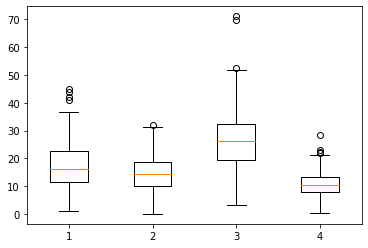

In [18]:
plt.boxplot([a[1]['Coverage'].values for a in byfactor.groupby('Library')]);

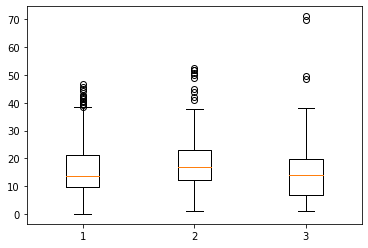

In [19]:
plt.boxplot([a[1]['Coverage'].values for a in byfactor.groupby('Extraction')]);

In [20]:
import statsmodels.formula.api as smf

In [21]:
byfactor['Library'] = byfactor['Library'].apply(int)

In [22]:
byfactor_bysample = byfactor.groupby('Sample').mean()
byfactor_bysample['Library'] = byfactor_bysample['Library'].apply(int)

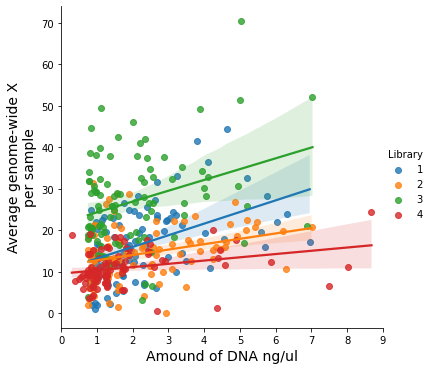

In [23]:
sns.lmplot(x='PicoGreen',y='Coverage',
           data=byfactor_bysample,hue='Library');
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
plt.xlim(0,9);
#plt.text(8.5,-11,s='Figure by Cullen Roth (PhD)',ha='center',
#            va='center',fontsize=8)
plt.savefig('../../FIGURES/Genome-wide-X-by-Library.png',
            dpi=150,bbox_inches='tight');

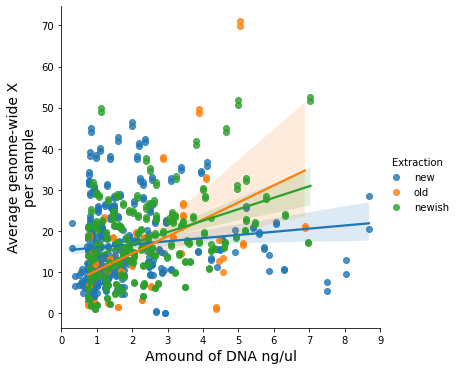

In [24]:
sns.lmplot(x='PicoGreen',y='Coverage',data=byfactor,hue='Extraction');
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
plt.xlim(0,9);
#plt.savefig('Genome-wide-X-by-Library.png',
#             dpi=150,bbox_inches='tight');

In [100]:
variant_depth = pd.read_csv('/home/croth/Bt22xFtc555-1/NOTES/Depth_by_sample.csv')
variant_depth.columns = ['Sample']+variant_depth.columns.tolist()[1:]
#variant_depth.index = variant_depth.Sample

In [101]:
depthsbyfactor_temp = byfactor_bysample.reset_index().merge(
    variant_depth)

In [102]:
depthsbyfactor= depthsbyfactor_temp.merge(factors[
    ['Sample','Extraction']])

In [103]:
depthsbyfactor

,Sample,Lane,PF Cluster,% of the lane,% perfect barcode,% one mismatch barcode,%PF Clusters,% >= Q30 bases,Mean Quality Score,Log2 PF Cluster,Coverage,PicoGreen,Library,DP,AR,MI,Extraction
0,PMY2556,1.5,1570303.5,0.330,17.060,82.940,100.0,91.400,35.480,20.582534,24.904222,1.478,3,38.0,0.969697,335.0,new
1,PMY2557,1.5,1237983.0,0.260,22.615,77.385,100.0,91.750,35.550,20.239511,19.633786,1.191,3,29.0,0.962963,344.0,new
2,PMY2558,1.5,1675237.5,0.350,15.460,84.540,100.0,91.690,35.535,20.675860,26.568422,3.431,3,41.0,0.972222,438.0,old
3,PMY2559,1.5,825867.5,0.170,13.460,86.540,100.0,90.490,35.310,19.655449,13.097842,1.369,1,17.0,0.941176,319.0,old
4,PMY2560,1.5,916661.0,0.190,16.840,83.160,100.0,90.650,35.350,19.805924,14.537781,3.369,1,20.0,0.950000,290.0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,PMY2936,1.5,945237.0,0.200,11.220,88.780,100.0,89.625,35.135,19.831449,14.990982,2.440,4,25.0,0.958333,324.0,new
380,PMY2937,1.5,793716.0,0.165,11.430,88.570,100.0,89.390,35.080,19.579385,12.587936,2.900,4,21.0,0.950000,311.0,new
381,PMY2938,1.5,673136.0,0.140,10.815,89.185,100.0,89.950,35.195,19.341390,10.675598,1.780,4,17.0,0.941176,339.0,new
382,PMY2939,1.5,791170.0,0.165,18.050,81.950,100.0,90.250,35.260,19.577758,12.547557,1.320,4,20.0,0.950000,306.0,new


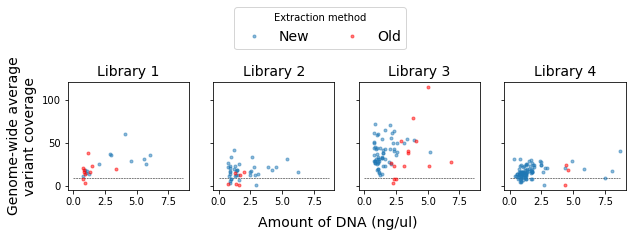

In [125]:
fig,ax = plt.subplots(1,4,figsize=(10,2),
                      sharey=True,sharex=True);
for i,j in depthsbyfactor.groupby('Library'):
    plt.sca(ax[i-1])
    new = j[(j.Extraction == 'new')]
    old = j[(j.Extraction == 'old')]
    plt.plot(new.PicoGreen,new.DP,'.',
             alpha=0.5,label='New' if i-1==1 else None);
    plt.plot(old.PicoGreen,old.DP,'r.',
             alpha=0.5,label='Old' if i-1==1 else None);
    
    plt.hlines(10,0,depthsbyfactor.PicoGreen.max(),
               color='k',linestyle='--',linewidth=0.5)
    plt.title('Library %s'%i,fontsize=14)
plt.sca(ax[1])
plt.legend(title='Extraction method',
           ncol=2,bbox_to_anchor=(1.65,1.75),
           fontsize=14) 
fig.text(x=0.5,y=-0.1,s='Amount of DNA (ng/ul)',
         fontsize=14,va='center',ha='center');
plt.sca(ax[0])
plt.ylabel('Genome-wide average\nvariant coverage',
          fontsize=14);
plt.savefig('../../FIGURES/Variant_depth_by_factor.png',
           dpi=200,bbox_inches='tight');

In [131]:
parent_pmy = ['PMY2649', 'PMY2650']

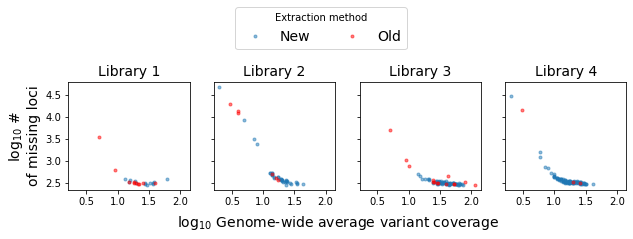

In [145]:
fig,ax = plt.subplots(1,4,figsize=(10,2),
                      sharey=True,sharex=True);
for i,j in depthsbyfactor[~(depthsbyfactor.Sample.isin(parent_pmy))
                         ].groupby('Library'):
    plt.sca(ax[i-1])
    new = j[(j.Extraction == 'new')]
    old = j[(j.Extraction == 'old')]
    plt.plot(np.log10(new.DP+1),np.log10(new.MI+1),'.',
             alpha=0.5,label='New' if i-1==1 else None);
    plt.plot(np.log10(old.DP+1),np.log10(old.MI+1),'r.',
             alpha=0.5,label='Old' if i-1==1 else None);
    
    #plt.hlines(10,0,depthsbyfactor.PicoGreen.max(),
    #           color='k',linestyle='--',linewidth=0.5)
    plt.title('Library %s'%i,fontsize=14)
plt.sca(ax[1])
plt.legend(title='Extraction method',
           ncol=2,bbox_to_anchor=(1.65,1.75),
           fontsize=14) 
fig.text(x=0.5,y=-0.1,s='log$_{10}$ Genome-wide average variant coverage',
         fontsize=14,va='center',ha='center');
plt.sca(ax[0])
plt.ylabel('log$_{10}$ # \nof missing loci',
          fontsize=14);
plt.savefig('../../FIGURES/Variant_missing_by_depth_and_factor.png',
           dpi=200,bbox_inches='tight');

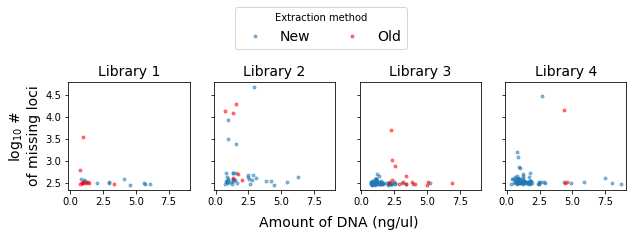

In [139]:
fig,ax = plt.subplots(1,4,figsize=(10,2),
                      sharey=True,sharex=True);
for i,j in depthsbyfactor[~(depthsbyfactor.Sample.isin(parent_pmy))
                         ].groupby('Library'):
    plt.sca(ax[i-1])
    new = j[(j.Extraction == 'new')]
    old = j[(j.Extraction == 'old')]
    plt.plot(new.PicoGreen,np.log10(new.MI+1),'.',
             alpha=0.5,label='New' if i-1==1 else None);
    plt.plot(old.PicoGreen,np.log10(old.MI+1),'r.',
             alpha=0.5,label='Old' if i-1==1 else None);
    
    #plt.hlines(10,0,depthsbyfactor.PicoGreen.max(),
    #           color='k',linestyle='--',linewidth=0.5)
    plt.title('Library %s'%i,fontsize=14)
plt.sca(ax[1])
plt.legend(title='Extraction method',
           ncol=2,bbox_to_anchor=(1.65,1.75),
           fontsize=14) 
fig.text(x=0.5,y=-0.1,s='Amount of DNA (ng/ul)',
         fontsize=14,va='center',ha='center');
plt.sca(ax[0])
plt.ylabel('log$_{10}$ # \nof missing loci',
          fontsize=14);
plt.savefig('../../FIGURES/Variant_missing_by_factor.png',
           dpi=200,bbox_inches='tight');

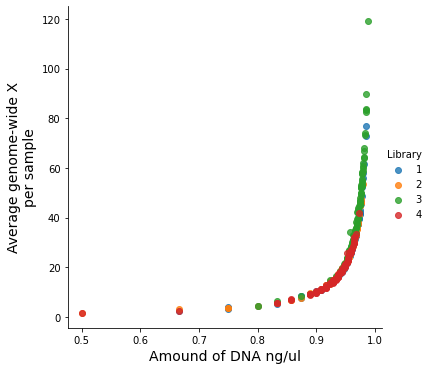

In [57]:
sns.lmplot(x='AR',y='DP',
           data=depthsbyfactor, hue='Library',fit_reg=False);
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
#plt.xlim(0,9);

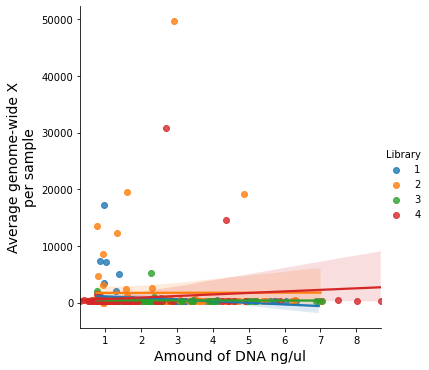

In [69]:
sns.lmplot(x='PicoGreen',y='MI',
           data=depthsbyfactor, hue='Library');
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
#plt.xlim(0,9);

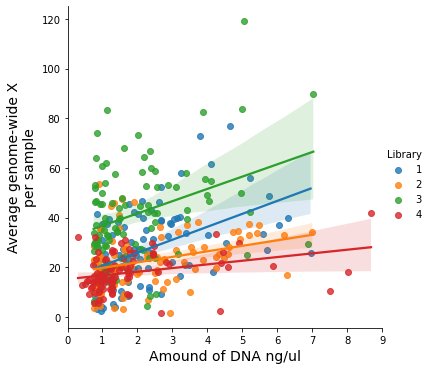

In [65]:
sns.lmplot(x='PicoGreen',y='DP',
           data=depthsbyfactor, hue='Library');
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
plt.xlim(0,9);

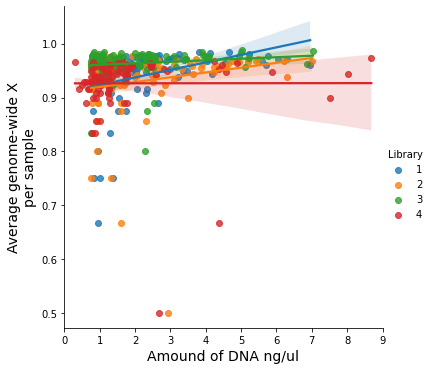

In [53]:
sns.lmplot(x='PicoGreen',y='AR',
           data=depthsbyfactor, hue='Library');
plt.xlabel('Amound of DNA ng/ul',fontsize=14);
plt.ylabel('Average genome-wide X\nper sample',fontsize=14);
plt.xlim(0,9);